[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
* 관련기사: [지난해 온라인 쇼핑 18% 증가...'온라인 해외 수출'도 급증 | KBS WORLD Radio](https://news.kbs.co.kr/news/view.do?ncd=4375462)


### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [1]:
# 라이브러리 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 한글폰트 설정
* https://github.com/ychoi-kr/koreanize-matplotlib

In [2]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서는 아래 모듈을 설치하고 불러와서 사용하세요. 

# !pip install koreanize-matplotlib

# import koreanize_matplotlib

In [3]:
# 시각화를 위한 폰트 설정
# os 별로 폰트를 다르게 설정해 줍니다.
import os

if os.name == 'posix':
    sns.set(font="Apple Gothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

In [4]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [5]:
df_raw = pd.read_csv("../data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_202002.csv", 
                     encoding="cp949")
df_raw.shape

(450, 27)

In [6]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
EU            45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [7]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,41204,39108,36536,47981,39995,43443,53852,51478
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2071,2657,2951,1818,1483
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,36020,35505,34219,45910,37338,40492,52034,49995
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,696,567,773,854,621,646,934,802
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,696,567,773,854,621,646,934,802
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1778
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1729
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

**melt 함수**
- 행에 있는 데이터를 열로 옮기는 함수

In [8]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4 p)'],
      dtype='object')

In [9]:
df_raw.values

array([['합계', '합계', '계', ..., 1338103, 1517805, 1860640],
       ['합계', '합계', '면세점', ..., 1157158, 1336372, 1645003],
       ['합계', '합계', '면세점 이외', ..., 180945, 181433, 215637],
       ...,
       ['기타', '기 타', '계', ..., 689, 469, 1094],
       ['기타', '기 타', '면세점', ..., 1, 0, 1],
       ['기타', '기 타', '면세점 이외', ..., 688, 469, 1093]], dtype=object)

In [10]:
df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"])

,국가(대륙)별,상품군별,판매유형별,variable,value
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531
10797,기타,기 타,계,2019 4/4 p),1094
10798,기타,기 타,면세점,2019 4/4 p),1


In [11]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"],
                 var_name="기간", value_name="백만원")
df.shape

(10800, 5)

In [12]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


## 데이터 전처리
### 기간에서 연도를 분리하기

In [14]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [15]:
# 기간에서 분기만 분리하기
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [16]:
# - 문자를 결측치로 변경하고 float 타입으로 변경하기(np.nan이 float타입이기 때문에)

df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


### 필요없는 데이터 제거하기

In [17]:
# 메모리: 590.8+ KB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [18]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [19]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

In [20]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "계" 데이터만 가져와서 봐야지
# 평균값을 구하는 그래프에서 올바른 값을 표현할 수 있습니다.
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


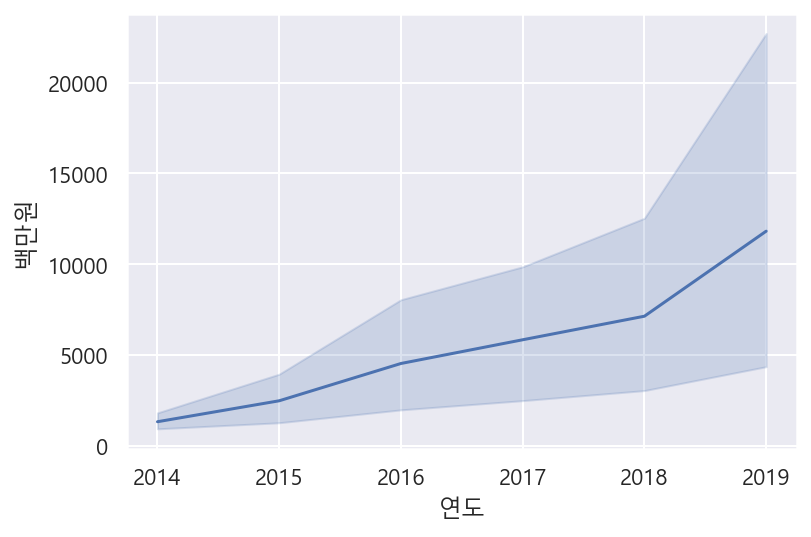

In [21]:
# 연도, 판매액 lineplot으로 그리기
sns.lineplot(data=df_total, x="연도", y="백만원")

2019년까지 꾸준히 성장하고 있습니다.

- legend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

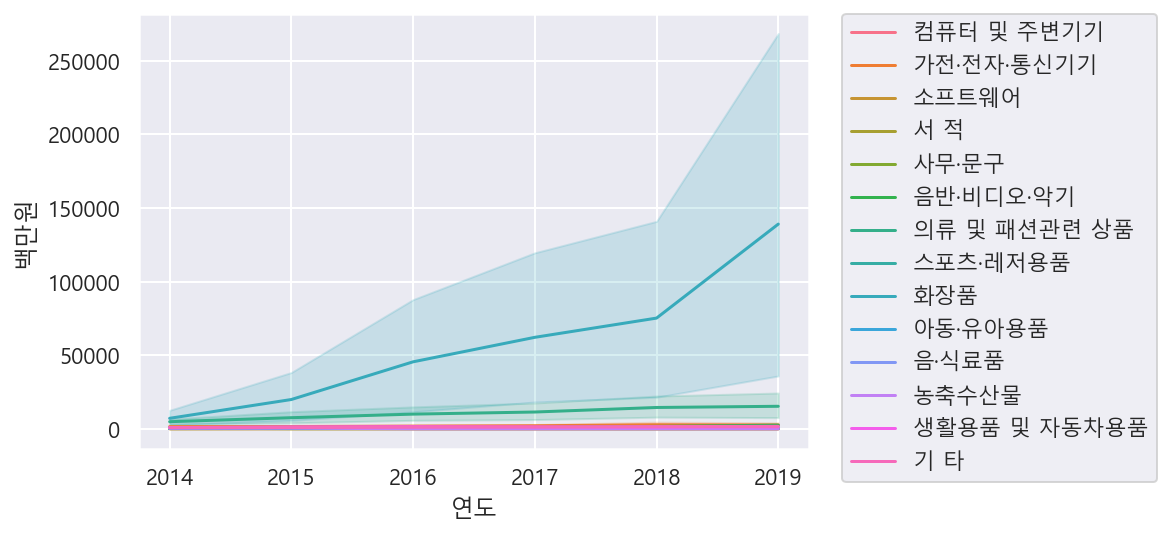

In [24]:
# 연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시하기
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

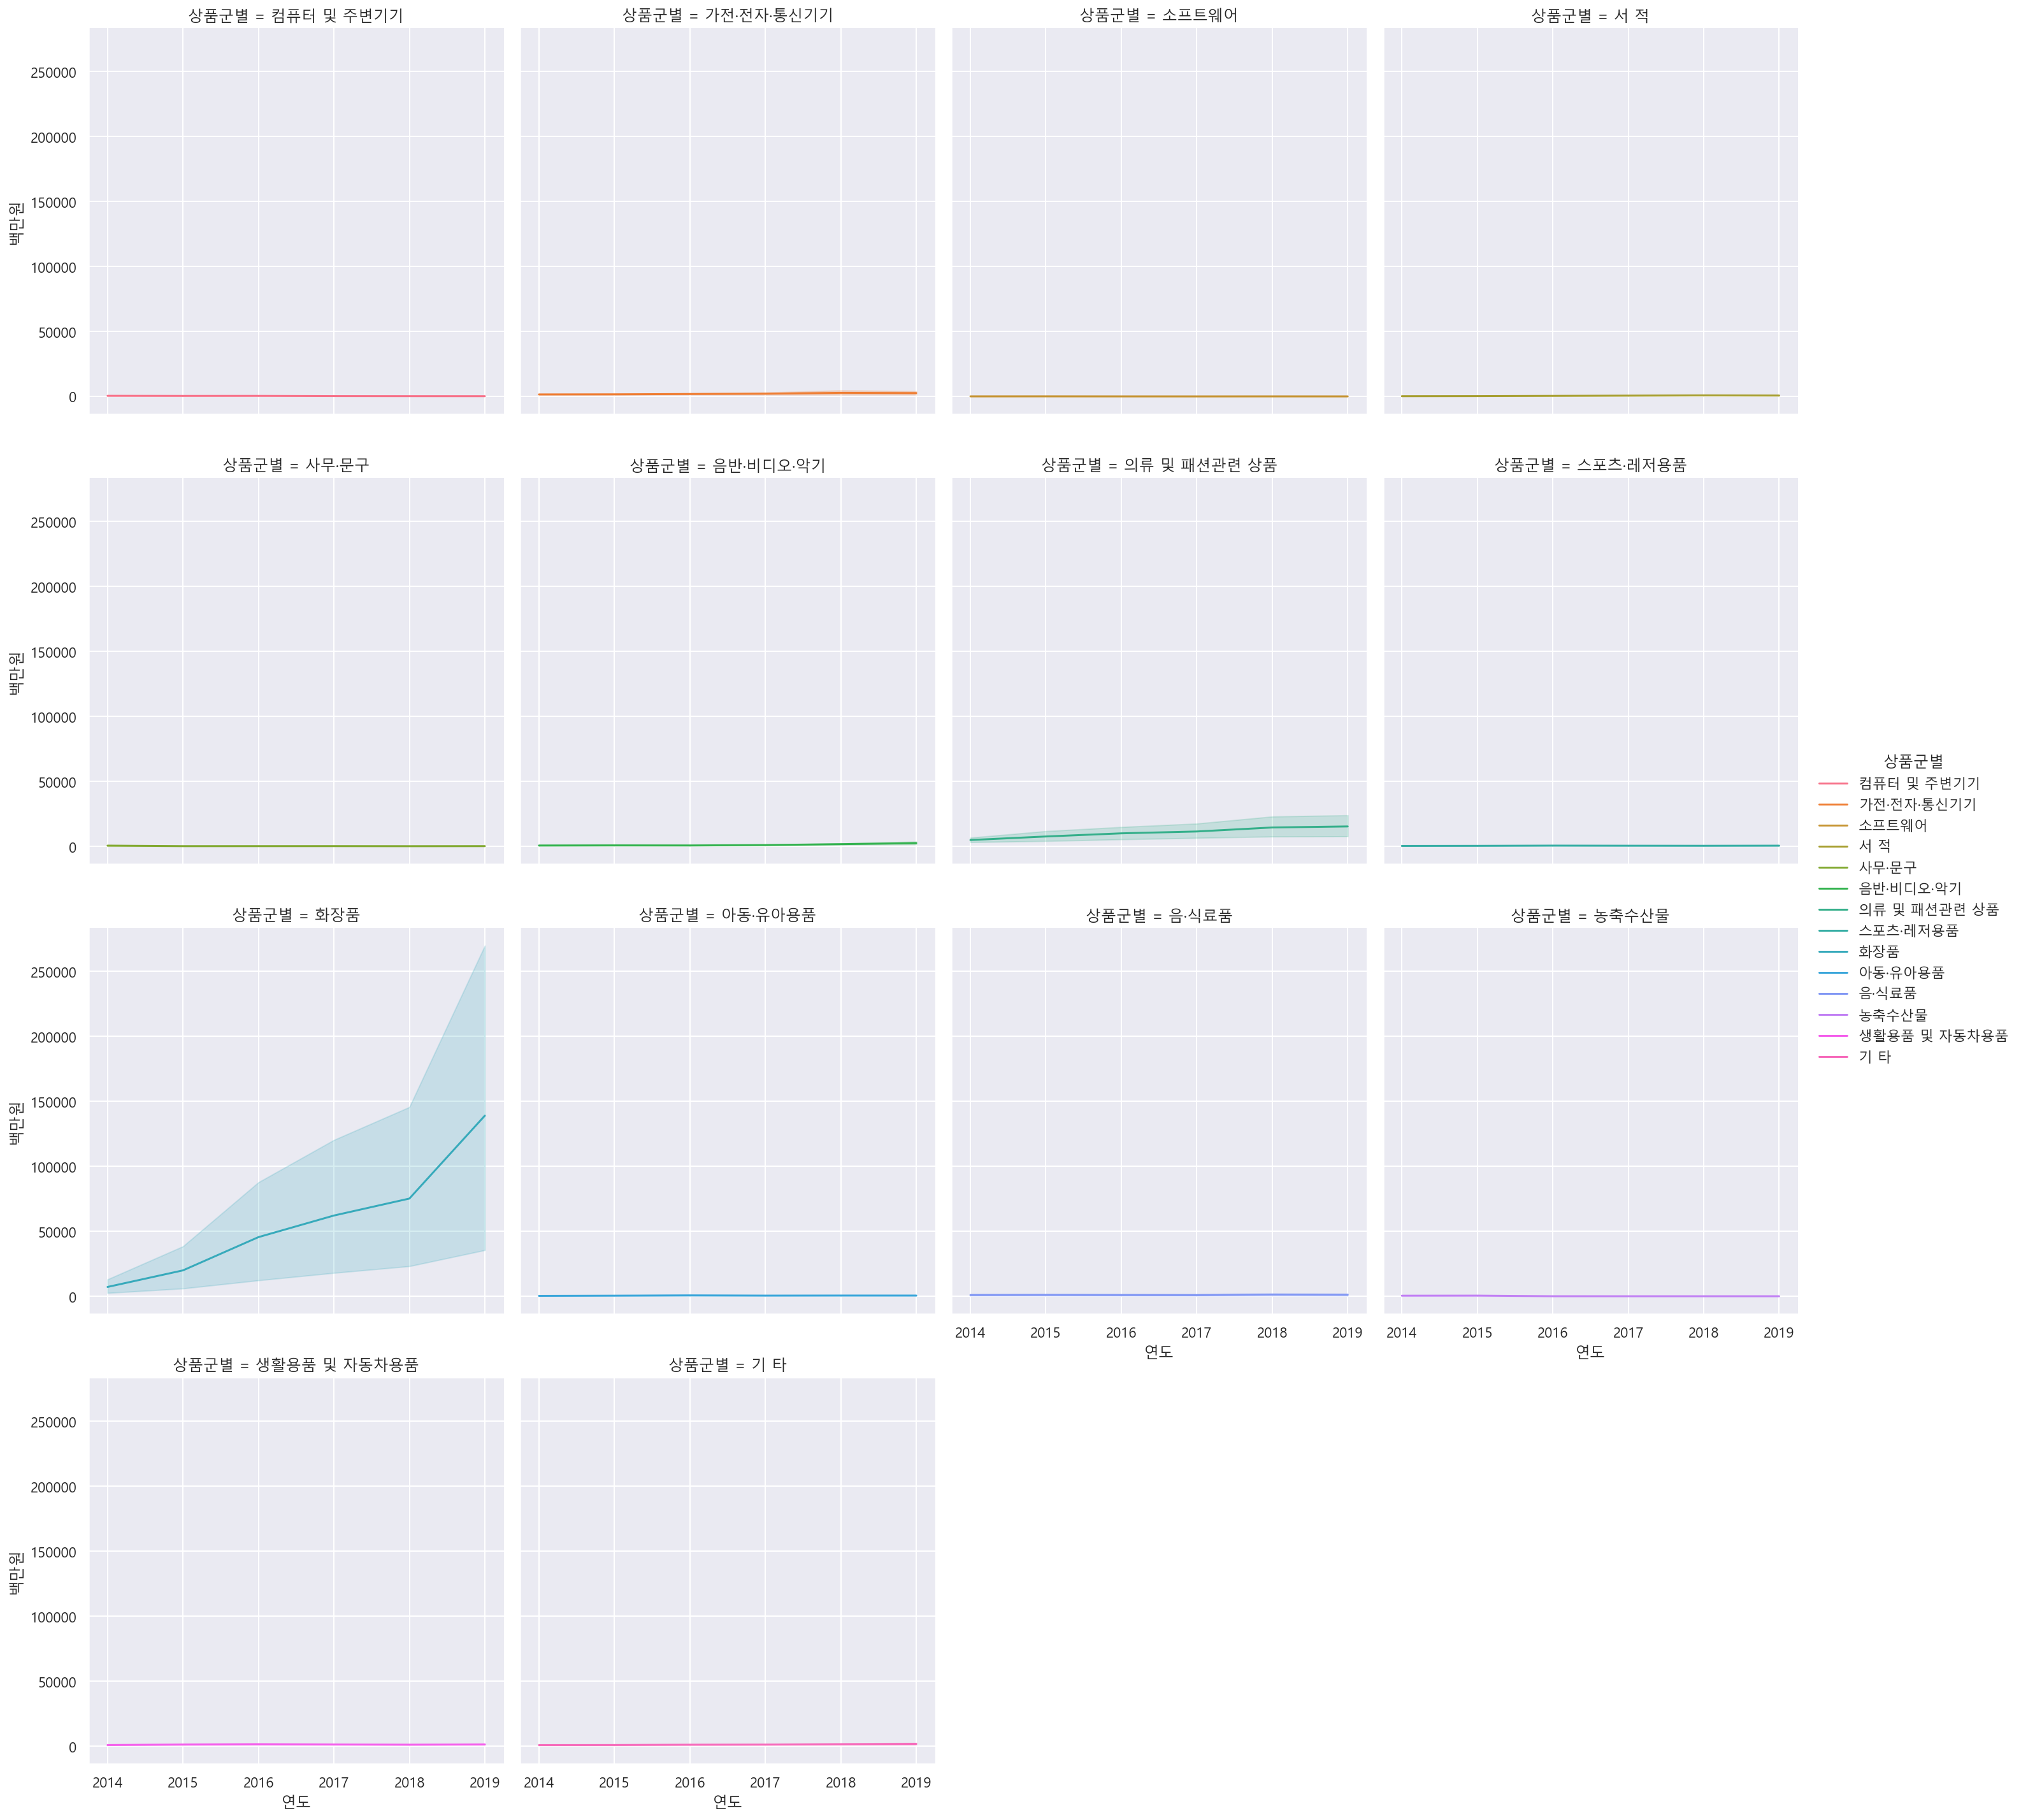

In [25]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기
sns.relplot(data=df_total, x="연도", y="백만원", 
            hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [26]:
# isin을 사용해 화장품만 제외를 하고 df_sub이라는 변수에 담습니다.

df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])].copy()
df_sub.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


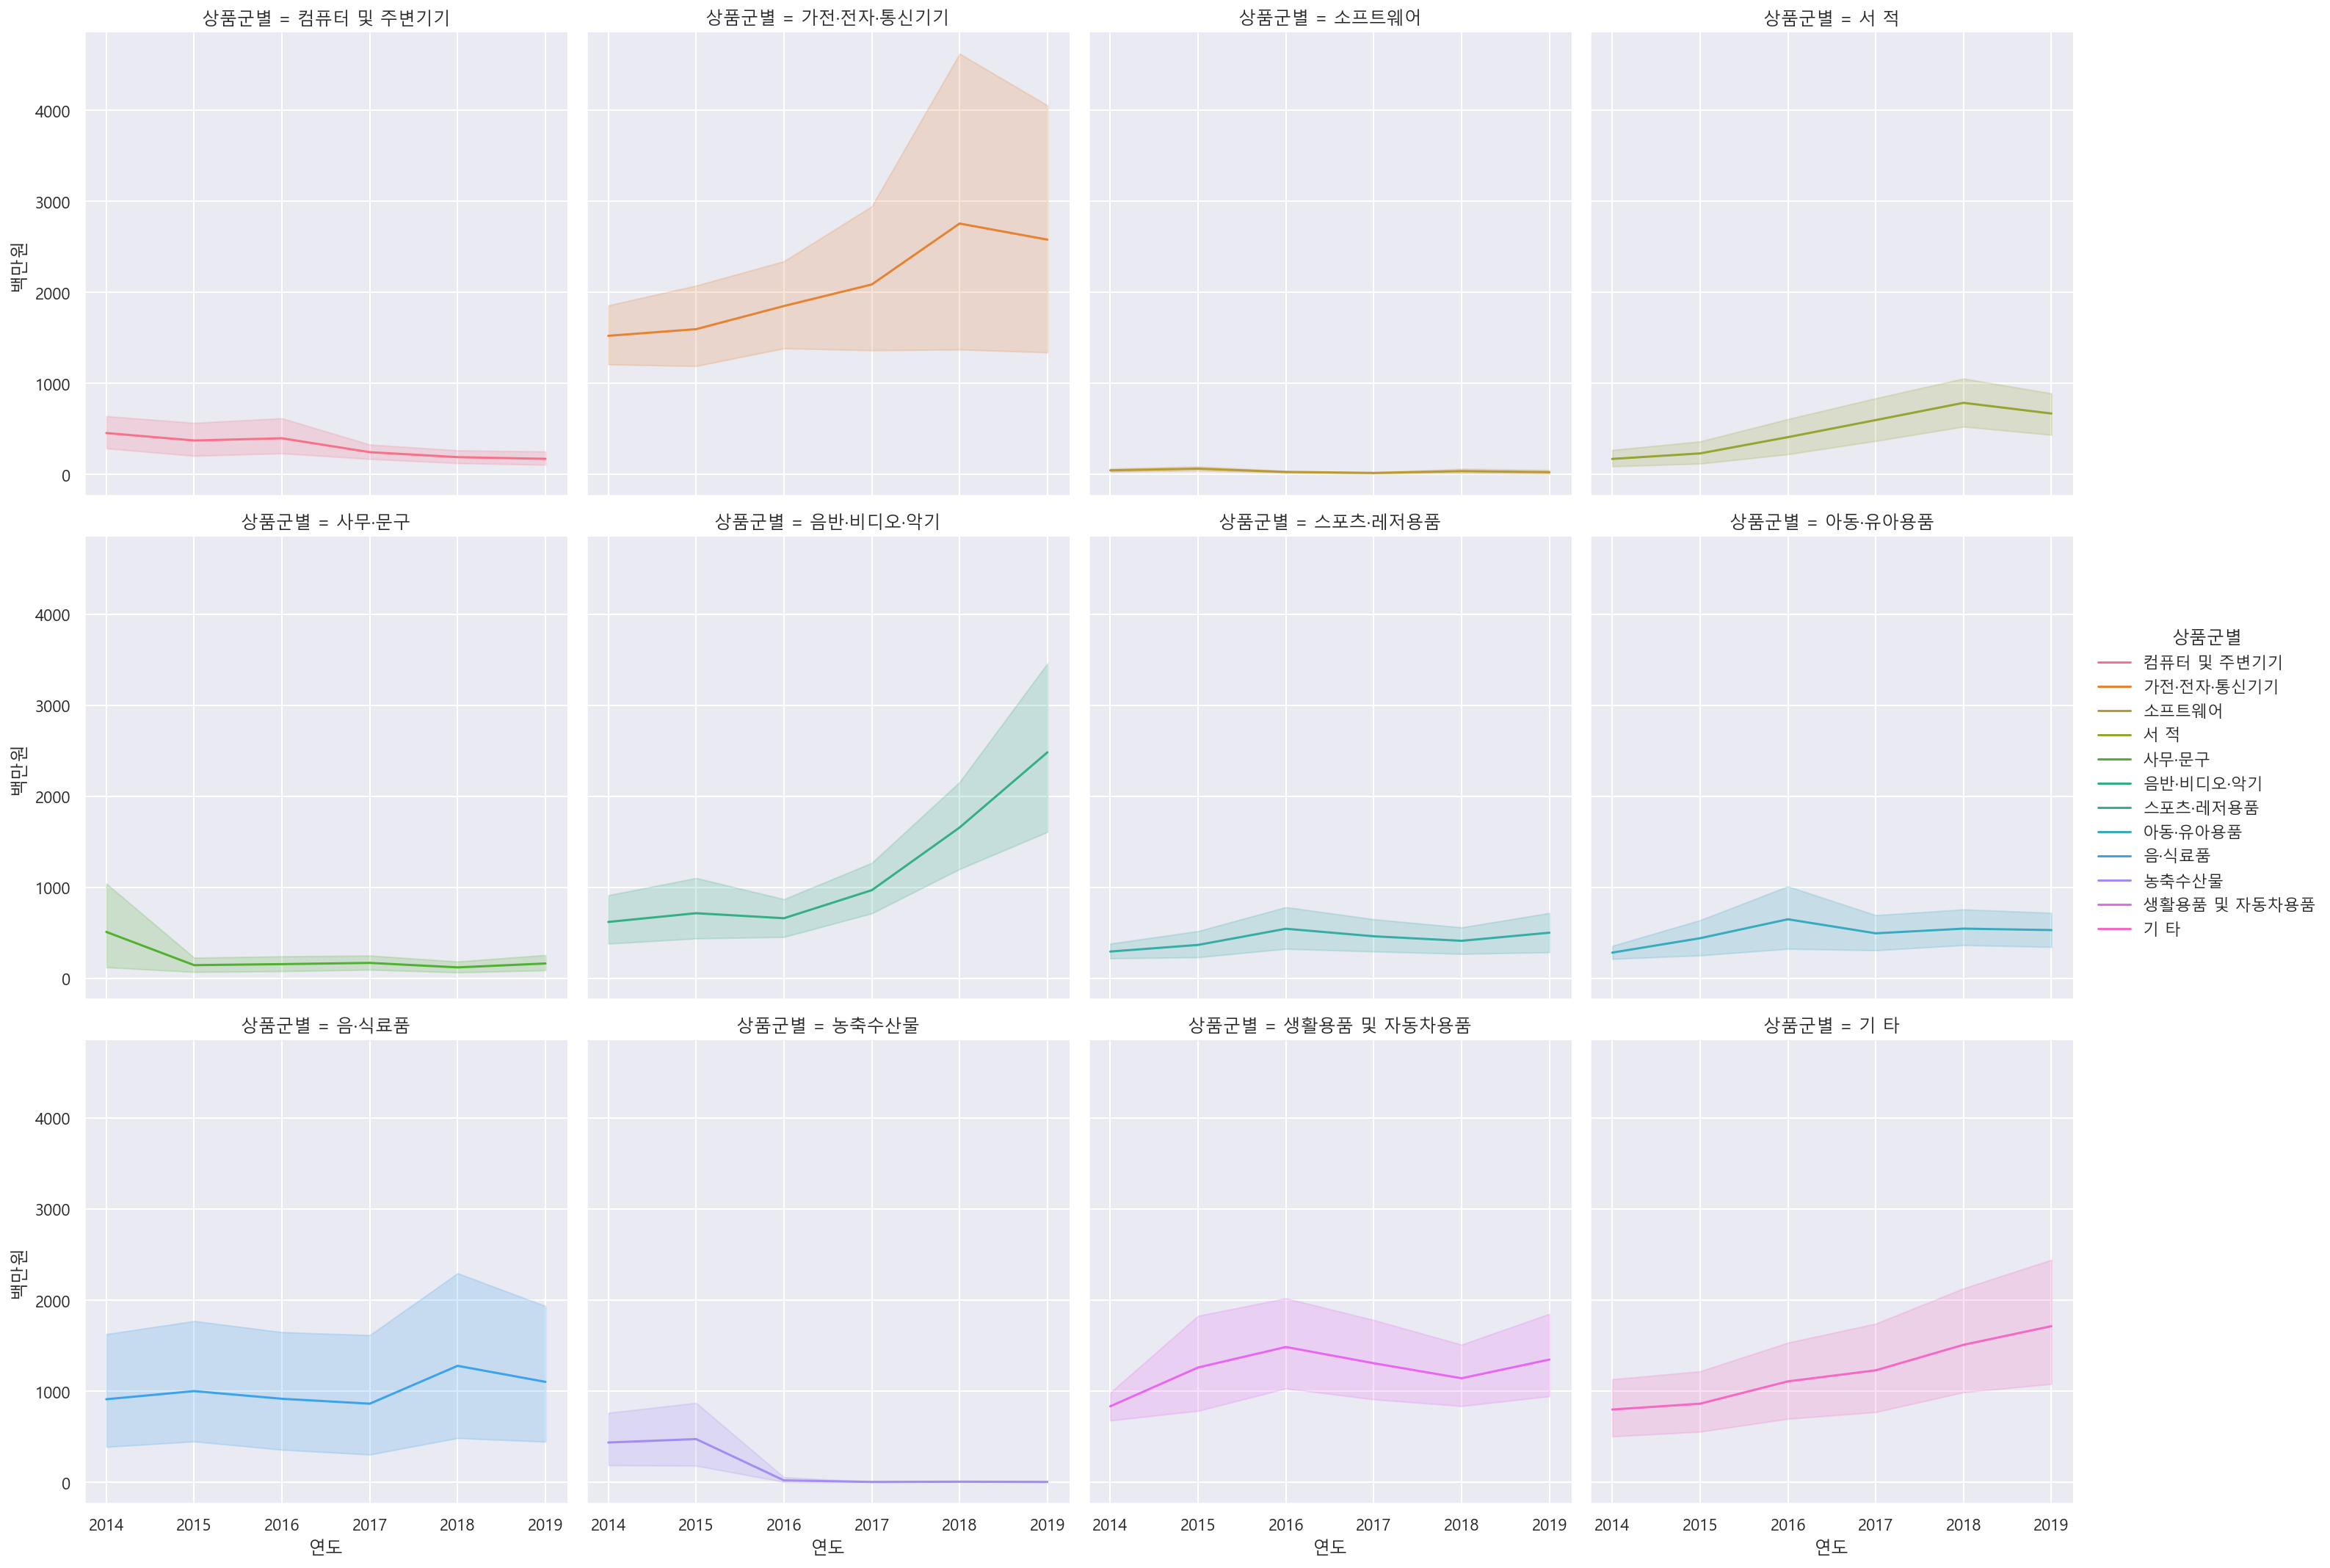

In [27]:
# 연도별 판매액을 상품군별로 relplot을 활용해 서브플롯으로 그려보기

sns.relplot(data=df_sub, x="연도", y="백만원",
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

### 화장품의 온라인쇼핑 해외직접판매액

In [28]:
# df_cosmetic이라는 변수에 상품군별이 화장품인 데이터만 가져오기

df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

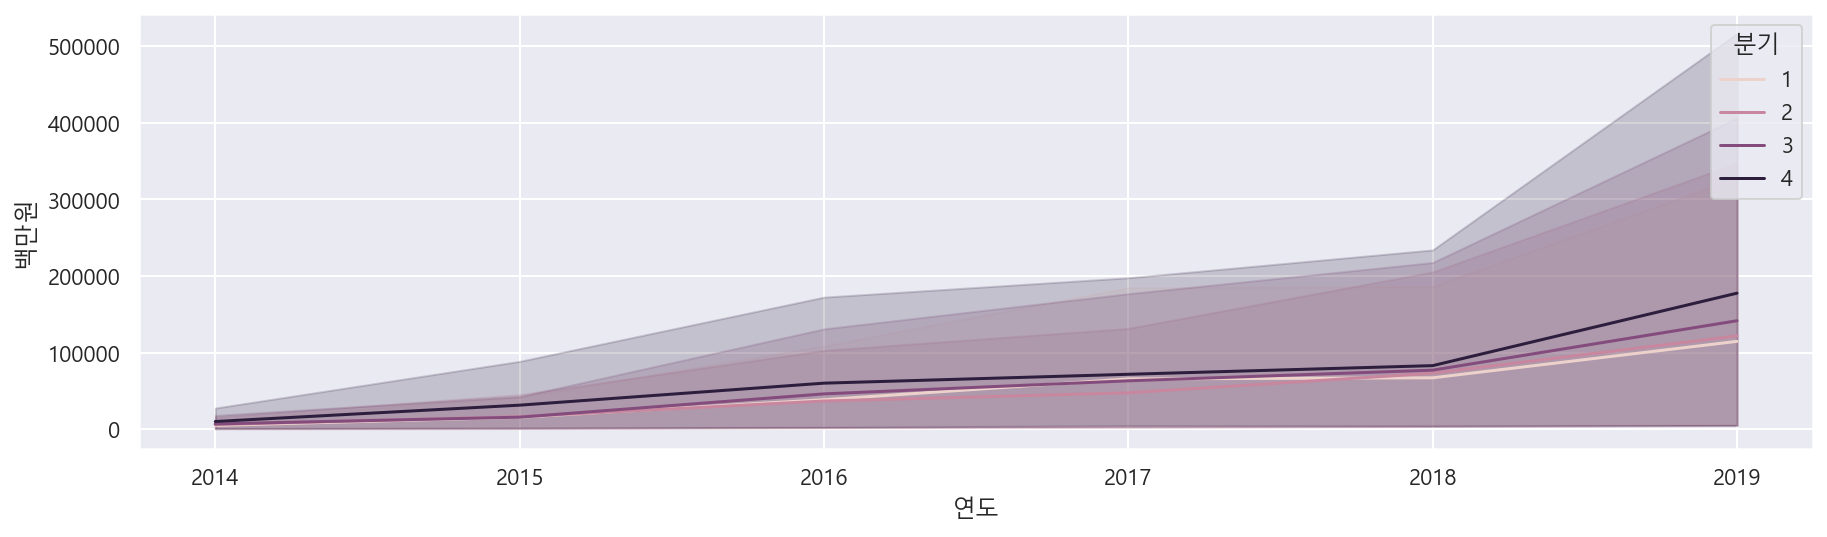

In [29]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 표현해보기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

시각화 그래프를 그려보니 1분기부터 4분기까지 계속 성장하고 있습니다.

In [30]:
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,EU,화장품,계,2014 1/4,937.0,2014,1


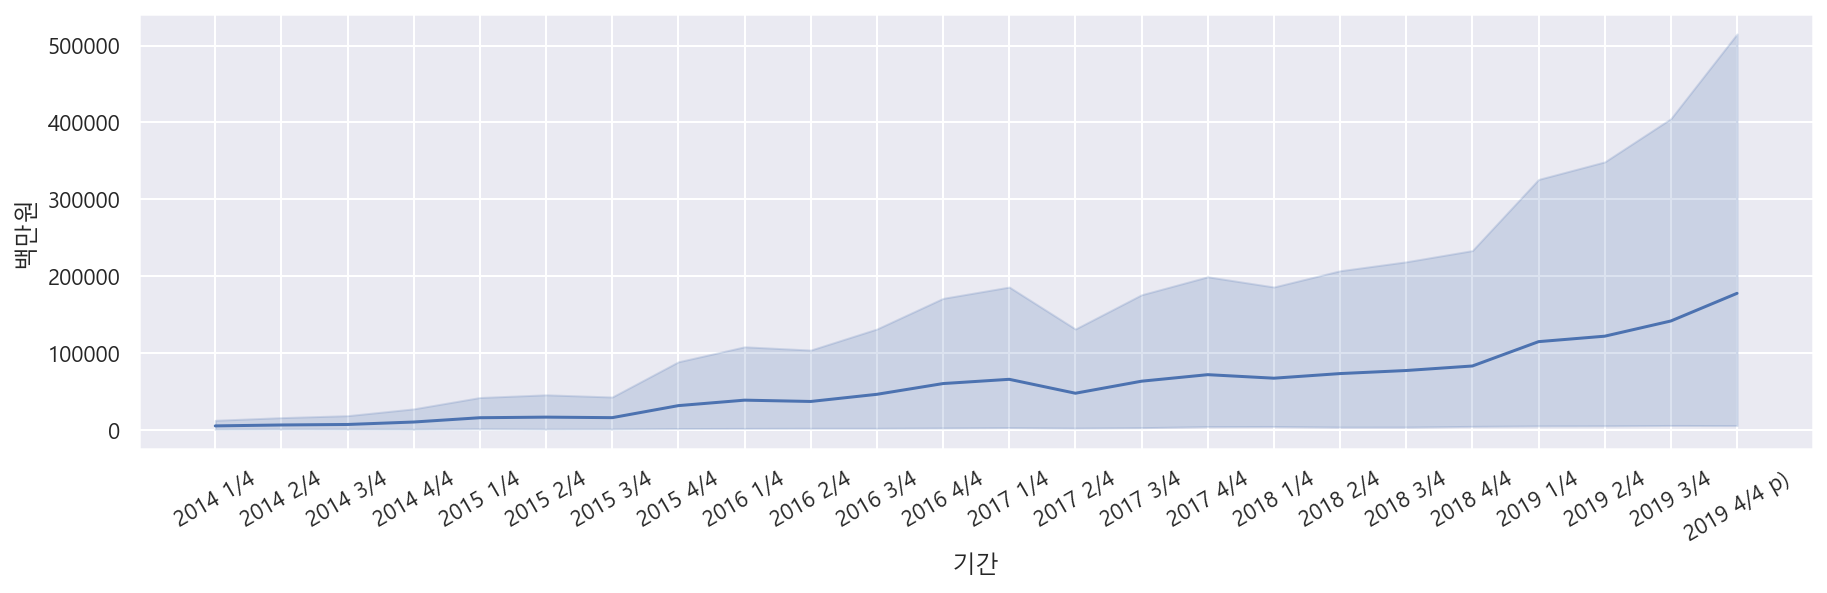

In [31]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

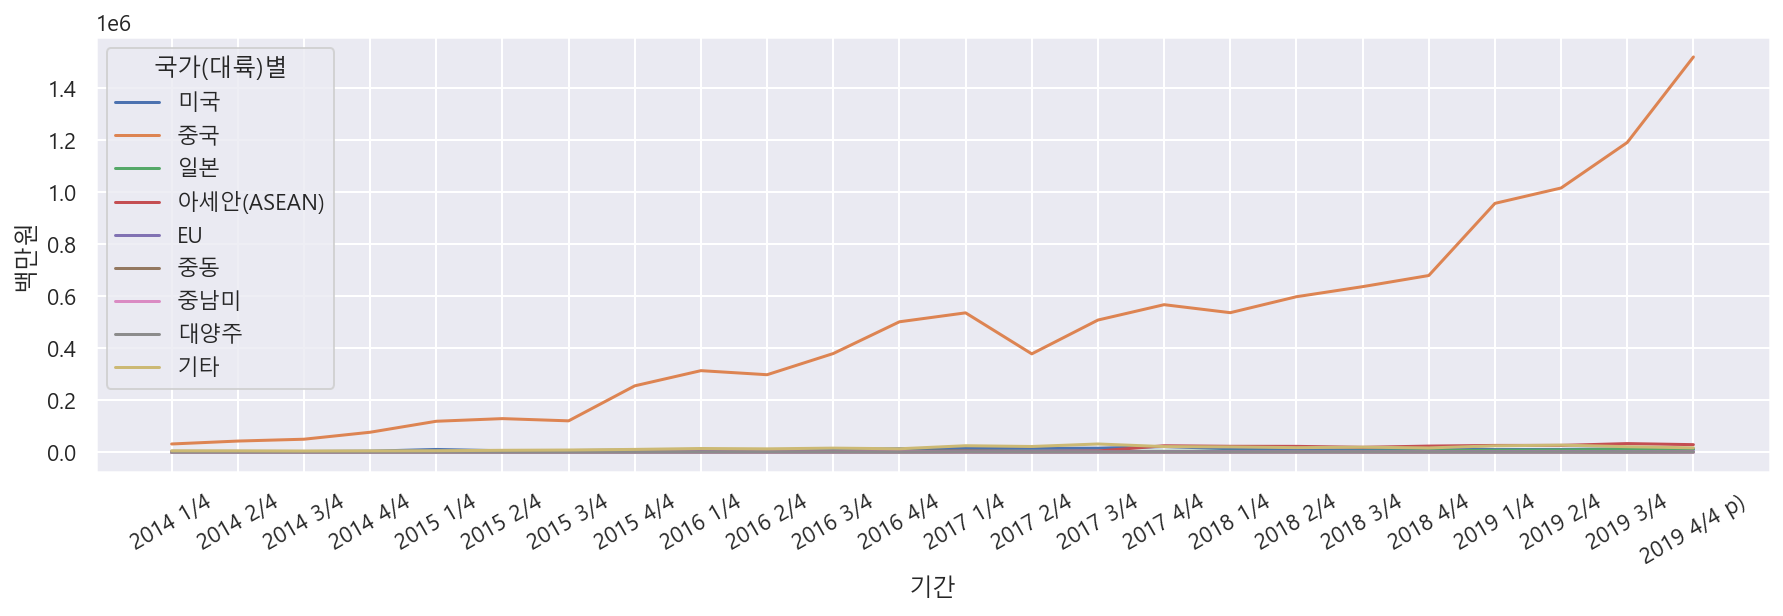

In [32]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

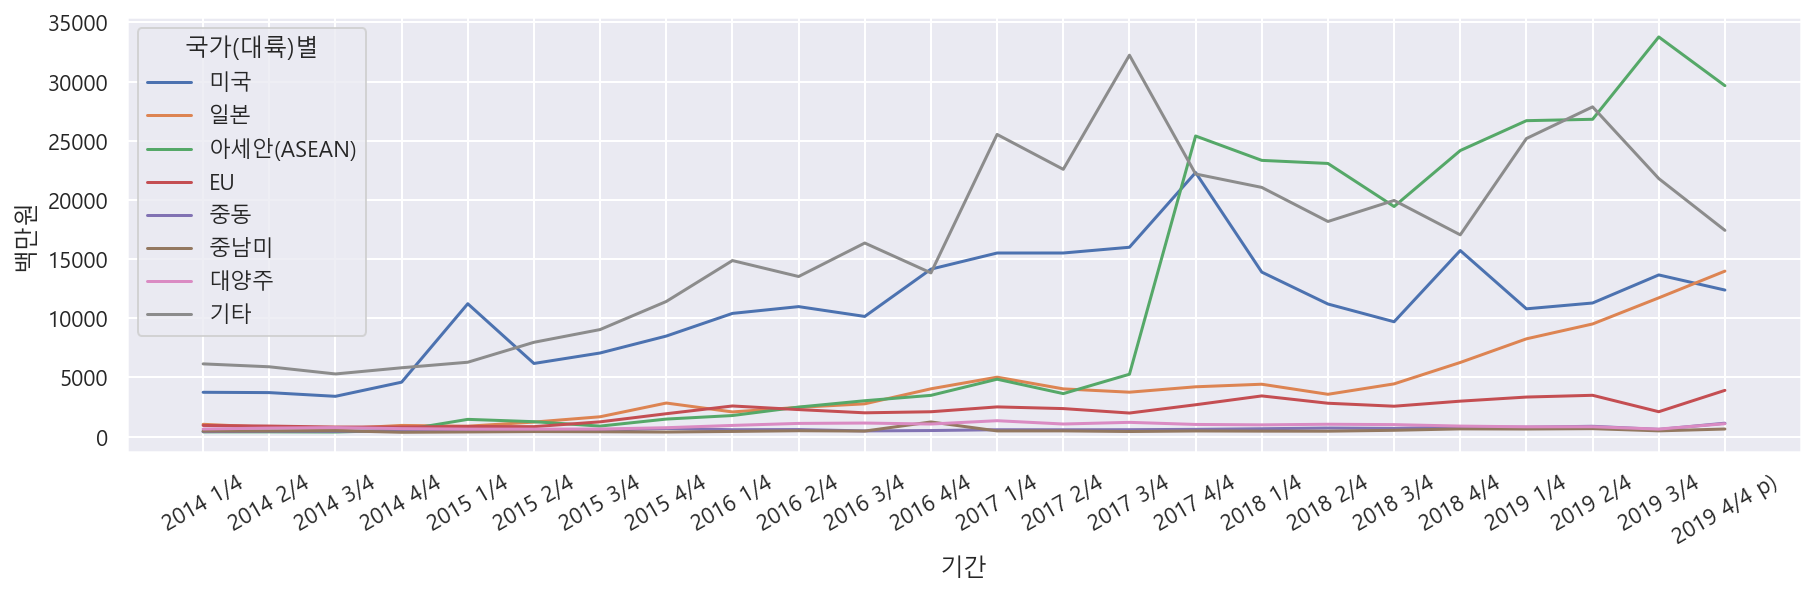

In [33]:
# 중국 매출액이 높아 다른 국가의 매출액 변화가 잘 안보이기 때문에 중국을 제외한 국가의 매출 시각화

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], 
             x="기간", y="백만원", hue="국가(대륙)별")

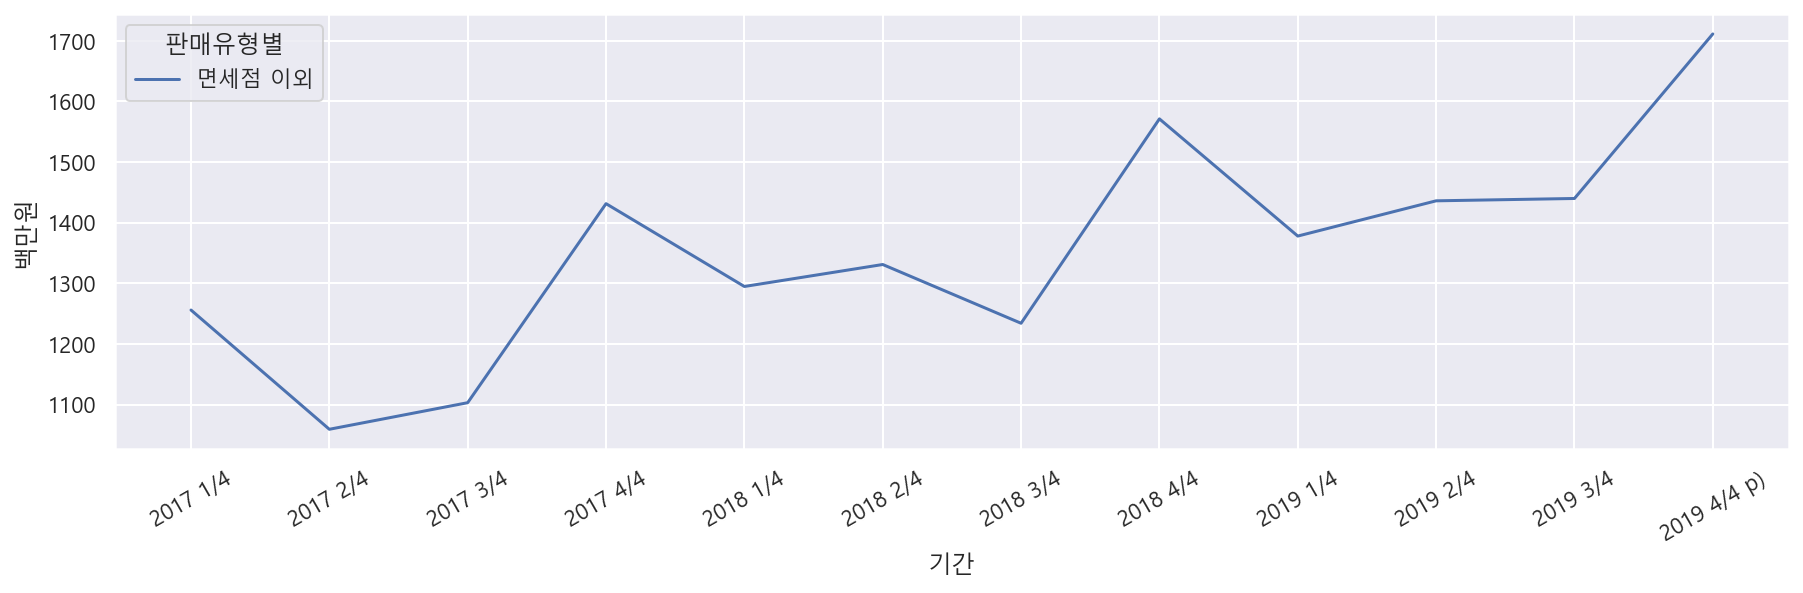

In [34]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고, "판매유형별"로 다른 색상으로 표시하기

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", ci=None)

판매유형별 데이터가 2017년부터 존재하기 때문에 국가(대륙)별 그래프와 달리 2017년부터 그래프가 그려집니다.

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [35]:
# df_fashion이라는 변수에 의류 데이터만 가져와 따로 담아주기
df_fashion = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1


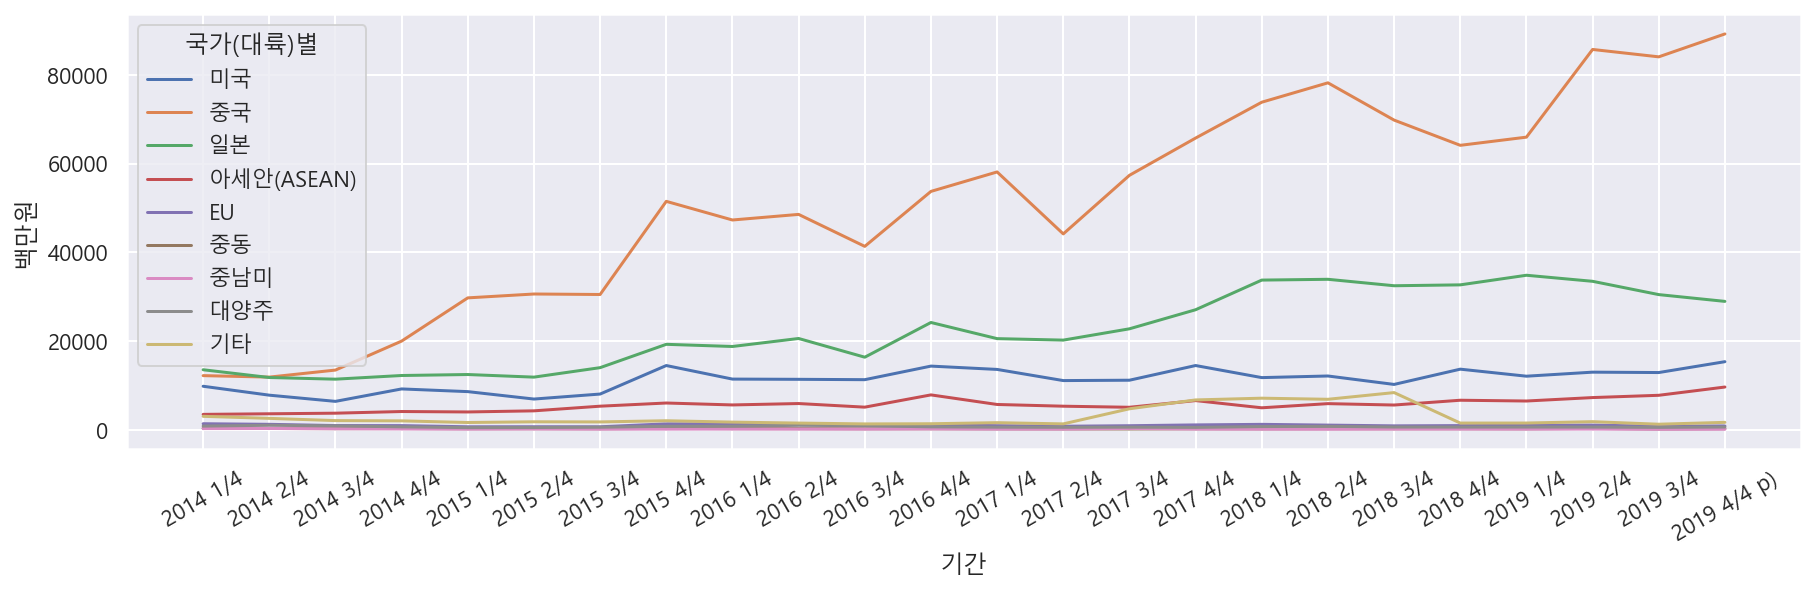

In [36]:
# "의류 및 패션관리 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "국가(대륙)별"로 다른 색상으로 표시하기

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

그래프를 그려보니 꾸준히 증가하고 있습니다. 중국, 일본, 미국, 아세안 순으로 성장하고 있습니다.

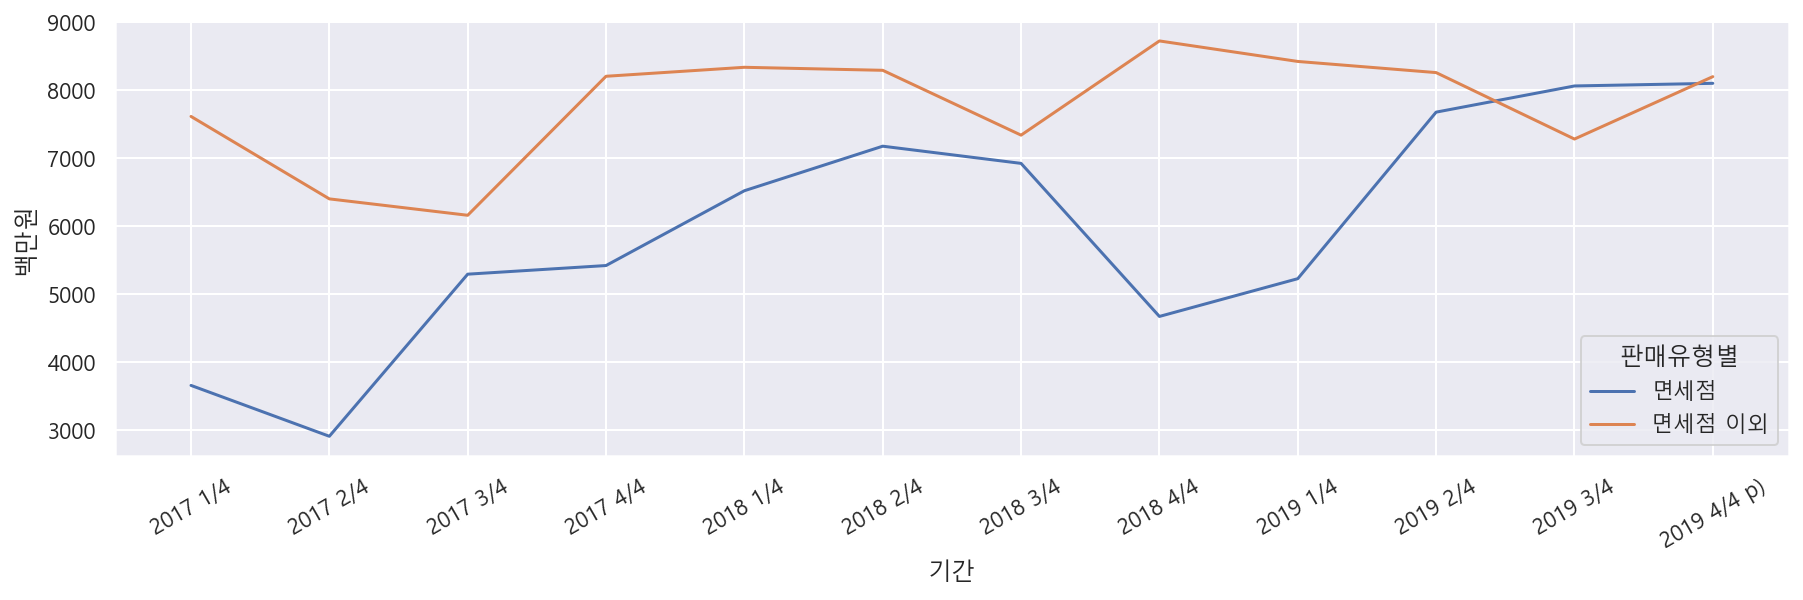

In [37]:
# "의류 및 패션관리 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "판매유형별"로 다른 색상으로 표시하기

df_fashion2 = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

"계"를 제거하고 그립니다.   
2017년 데이터 부터 볼 수 있습니다.    
면세점 이외의 데이터는 꾸준히 성장했고, 면세점 데이터도 성장하고 있습니다. 두 부문 모두 계속 성장 중입니다.    

### 데이터 집계하기

In [44]:
df_fashion["판매유형별"].value_counts()

계    216
Name: 판매유형별, dtype: int64

In [47]:
# 피봇테이블로 "국가(대륙)별", "연도"별 합계 금액을 표 형태로 구하기

result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", 
                                values="백만원", aggfunc="sum") # default: aggfunc="mean"
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,4485.0,3374.0,4899.0,3736.0,4102.0,3695.0
기타,9683.0,7248.0,5918.0,14387.0,23893.0,6275.0
대양주,3392.0,2349.0,3401.0,2266.0,2721.0,2381.0
미국,33223.0,38066.0,48451.0,50353.0,47774.0,53324.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23086.0,31155.0
일본,48960.0,57594.0,79905.0,90584.0,132808.0,127722.0
중국,57531.0,142339.0,190932.0,225407.0,285998.0,325018.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


### 연산결과를 시각적으로 보기

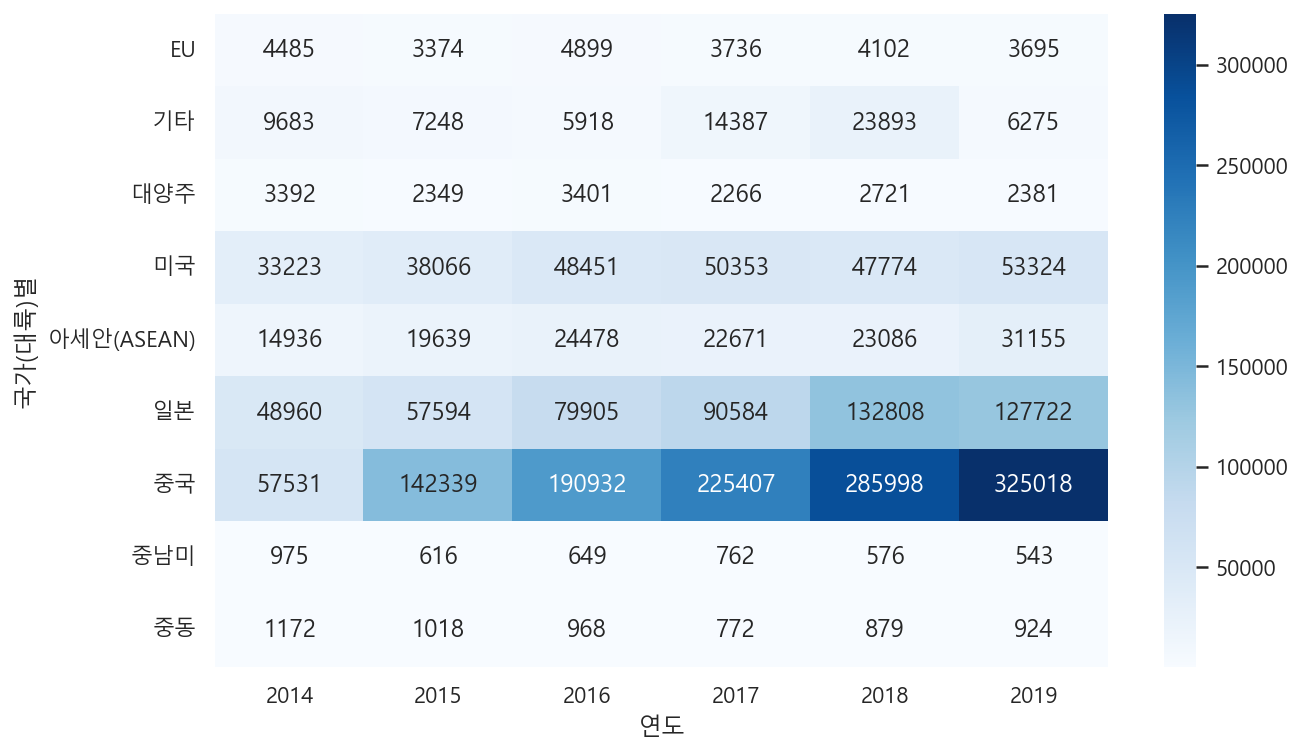

In [57]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기

plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

heatmap을 그려보면 온라인에서 판매가 상당히 많이 일어난다는 것을 알 수 있습니다.    
vmax는 시각화를 할 때 나타내는 최대값입니다. 이번에는 vmax와 vmin의 기본값을 그대로 사용해보겠습니다.

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

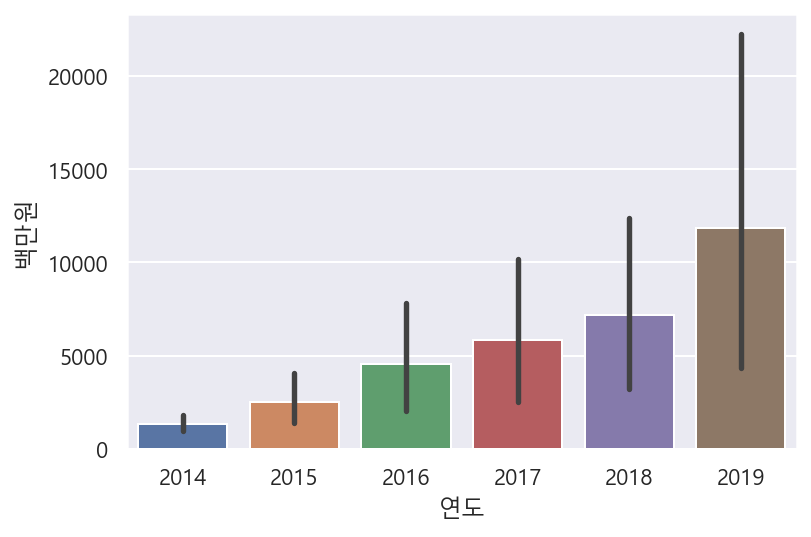

In [59]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화 하기

sns.barplot(data=df_total, x="연도", y="백만원") # 평균값을 그림

그래프를 보면 판매액이 꾸준히 증가했다는 사실을 알 수 있고, 신뢰구간도 연도에 따라 계속 길어집니다.

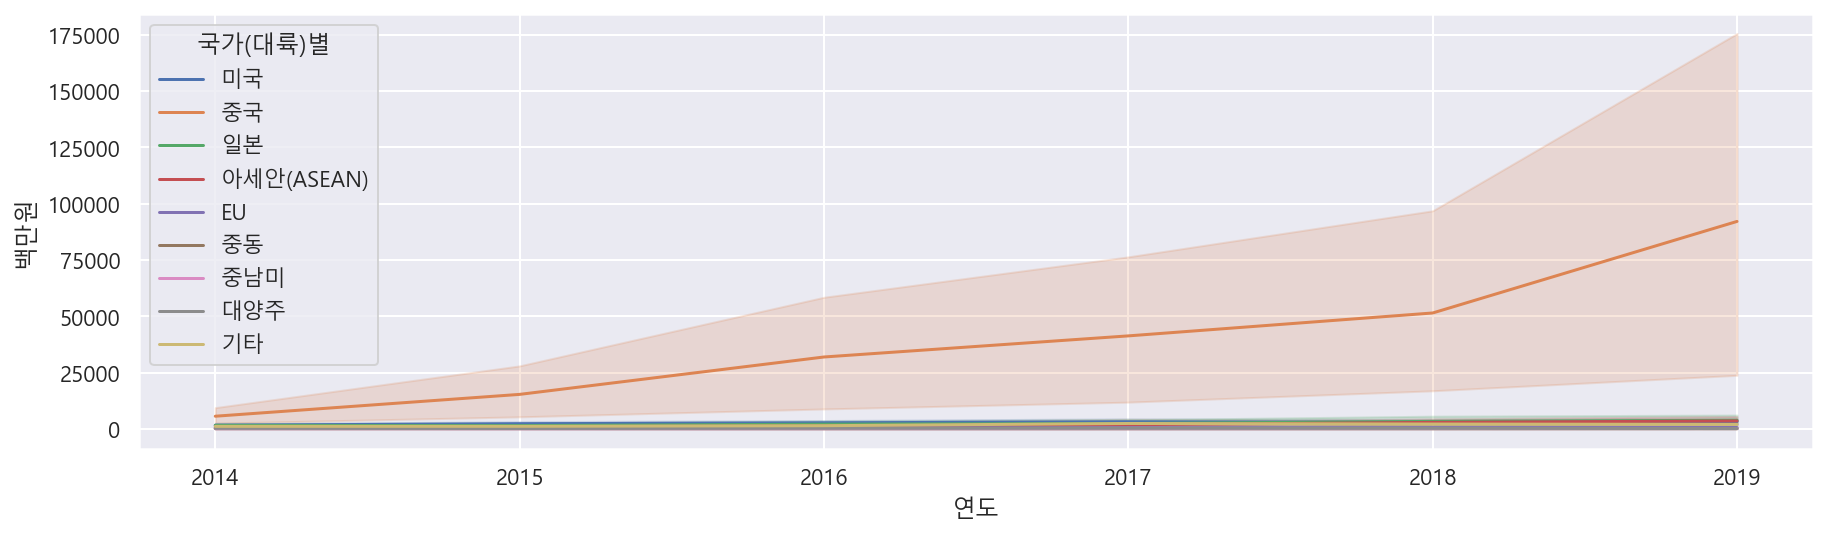

In [62]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

* legend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

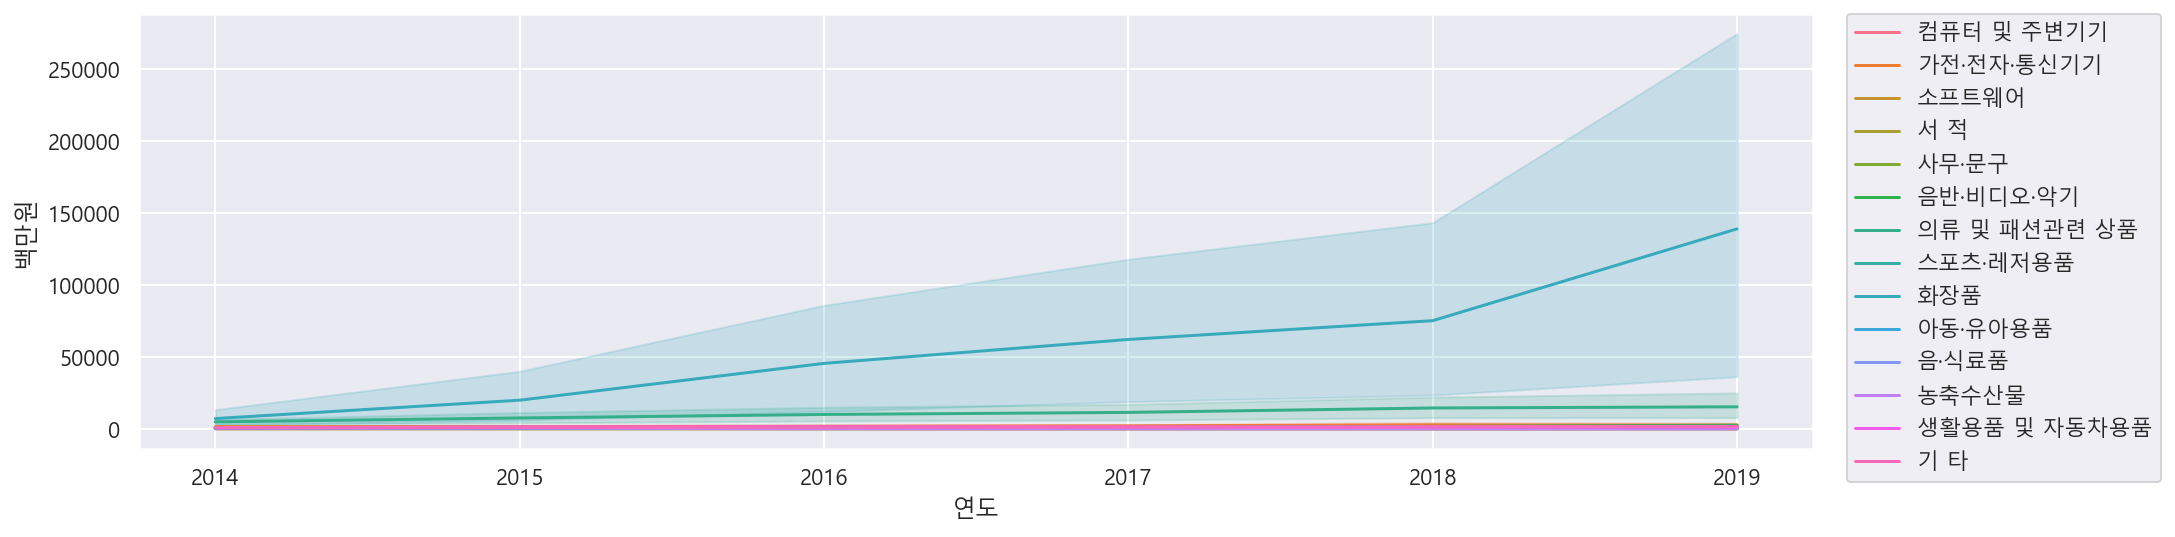

In [65]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

기사의 데이터를 따라 검증했더니 실제로 온라인 쇼핑액이 증가하고 있고, 판매를 하는 사람들이 많아지고 있다는 것을 알 수 있습니다.

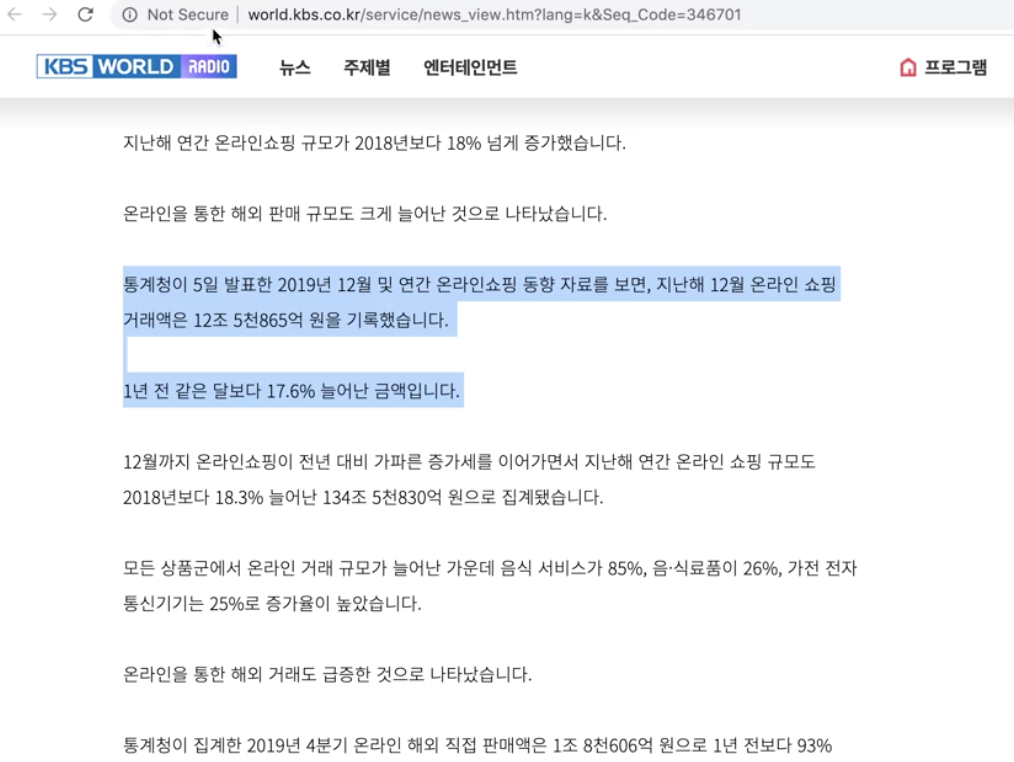